<a href="https://colab.research.google.com/github/josephxlp/SHORT-PROJx/blob/main/OBJDECT101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torchgeo --q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 11.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 454.5/454.5 kB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 74.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 833.3/833.3 kB 44.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 808.5/808.5 kB 37.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 811.0/811.0 kB 40.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.7/21.7 MB 65.6 MB/s eta 

In [2]:
import torchgeo

In [3]:
torchgeo.__version__

'0.6.1'

In [9]:
import torch
from torchgeo.trainers import ObjectDetectionTask
from torchgeo.datasets import VHR10
from torch.utils.data import DataLoader
import lightning.pytorch as pl
import matplotlib.pyplot as plt
import os

In [10]:
def preprocess(sample):
    sample["image"] = sample["image"].float() / 255.0
    return sample

def get_directory_size(directory):
  total_size = 0
  for dirpath, dirnames, filenames in os.walk(directory):
      for filename in filenames:
          file_path = os.path.join(dirpath, filename)
          # Skip if it is a symbolic link
          if not os.path.islink(file_path):
              total_size += os.path.getsize(file_path)
  return total_size

In [6]:
ds = VHR10(root='data/VHR10/', split='positive', transforms=preprocess, download=True)

100%|██████████| 76822614/76822614 [00:01<00:00, 72290253.97it/s]


Extracting data/VHR10/NWPU VHR-10 dataset.zip to data/VHR10/


100%|██████████| 1265416/1265416 [00:00<00:00, 3930101.65it/s]


loading annotations into memory...
Done (t=0.03s)
creating index...
index created!


In [14]:
def convert_size(size_bytes):
  megabytes = size_bytes / (1024 ** 2)  # Convert bytes to MB
  gigabytes = size_bytes / (1024 ** 3)  # Convert bytes to GB
  return megabytes, gigabytes

In [15]:
datapath = 'data/VHR10/'
size_in_bytes = get_directory_size(datapath)
size_in_mb, size_in_gb = convert_size(size_in_bytes)

print(f"Size of '{datapath}':")
print(f"{size_in_bytes} bytes")
print(f"{size_in_mb:.2f} MB")
print(f"{size_in_gb:.2f} GB")

Size of 'data/VHR10/':
154836334 bytes
147.66 MB
0.14 GB


In [12]:
len(ds)

650

In [16]:
import numpy as np

idx = np.random.randint(0, len(ds))

In [17]:
ds[idx]

{'image': tensor([[[0.0431, 0.0471, 0.0510,  ..., 0.5882, 0.5922, 0.5647],
          [0.0471, 0.0510, 0.0510,  ..., 0.8157, 0.8275, 0.8039],
          [0.0549, 0.0588, 0.0588,  ..., 0.8431, 0.8588, 0.8392],
          ...,
          [0.2353, 0.2235, 0.2000,  ..., 0.0902, 0.0745, 0.1176],
          [0.2000, 0.2078, 0.2157,  ..., 0.2667, 0.1608, 0.1255],
          [0.1765, 0.2078, 0.2314,  ..., 0.4941, 0.2902, 0.1686]],
 
         [[0.0431, 0.0471, 0.0510,  ..., 0.5686, 0.5725, 0.5451],
          [0.0471, 0.0510, 0.0510,  ..., 0.7961, 0.8078, 0.7843],
          [0.0588, 0.0627, 0.0588,  ..., 0.8275, 0.8431, 0.8235],
          ...,
          [0.2824, 0.2706, 0.2471,  ..., 0.0902, 0.0745, 0.1176],
          [0.2471, 0.2549, 0.2510,  ..., 0.2667, 0.1608, 0.1255],
          [0.2235, 0.2549, 0.2667,  ..., 0.4941, 0.2902, 0.1686]],
 
         [[0.0353, 0.0392, 0.0431,  ..., 0.5569, 0.5608, 0.5333],
          [0.0392, 0.0431, 0.0431,  ..., 0.7843, 0.7961, 0.7725],
          [0.0392, 0.0431, 0.05

In [18]:
ds[0]["image"].shape, ds[1]["image"].shape

(torch.Size([3, 808, 958]), torch.Size([3, 806, 950]))

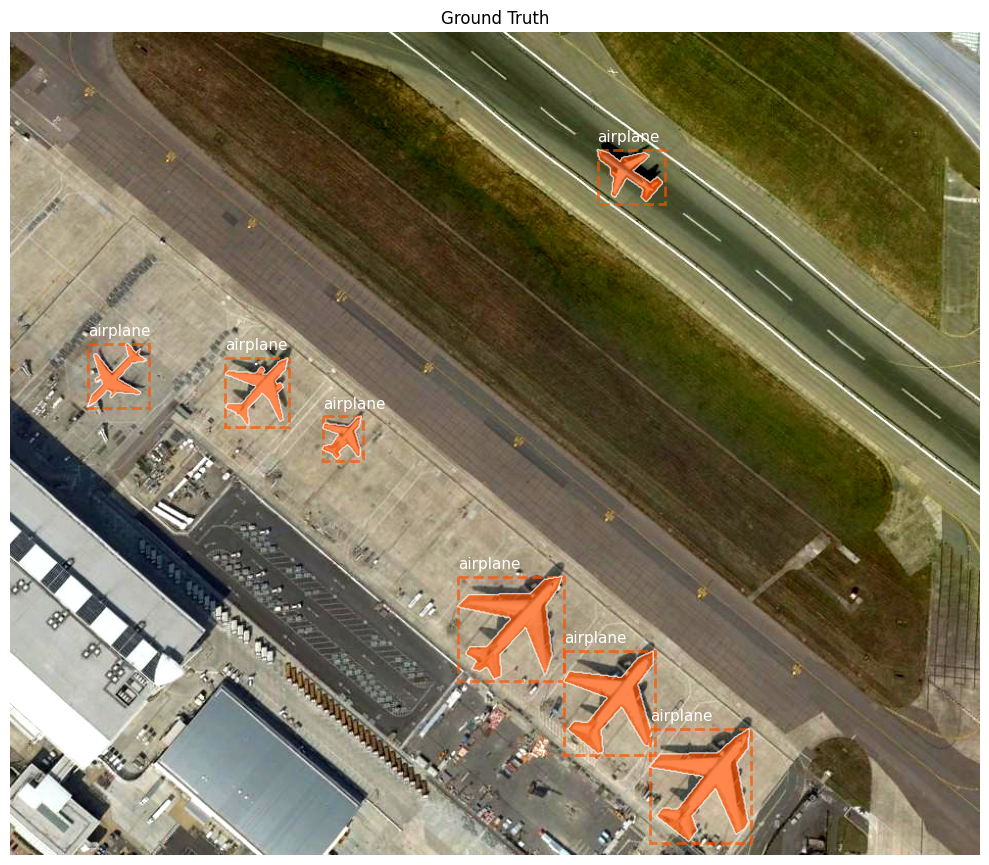

In [19]:
ds.plot(ds[1])
plt.show()
plt.close()

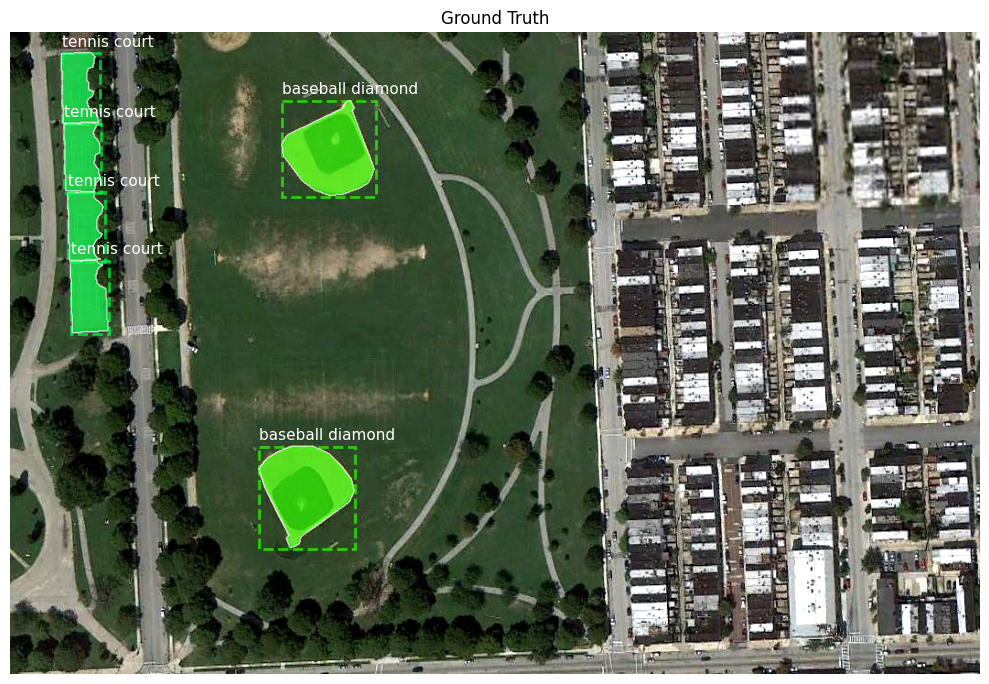

In [20]:
ds.plot(ds[idx])
plt.show()
plt.close()

In [21]:
def collate_fn(batch):
    new_batch = {
        "image": [item["image"] for item in batch],
        "boxes": [item["boxes"] for item in batch],
        "labels": [item["labels"] for item in batch],
        "masks": [item["masks"] for item in batch],
    }
    return new_batch

dl = DataLoader(ds, batch_size=32, num_workers=8, shuffle=True, collate_fn=collate_fn)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
